In [1]:
import os
import sys
import json
import random
import skimage.io as io
import matplotlib.pyplot as plt

dataDir = 'VQAEvaluation'
sys.path.insert(0, '%s/PythonHelperTools/vqaTools' %(dataDir))
from vqa import VQA
from VQAEvaluation.PythonEvaluationTools.vqaEvaluation.vqaEval import VQAEval

In [2]:
# set up file names and paths
versionType ='v2_' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0. 
dataSubType ='val2014'
annFile     ='data/VQA/%s%s_%s_annotations.json'%(versionType, dataType, dataSubType)
quesFile    ='data/VQA/%s%s_%s_%s_questions.json'%(versionType, taskType, dataType, dataSubType)
imgDir      ='data/coco2014/%s/' %(dataSubType)
resultType  ='real'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType']

In [48]:
# An example result json file has been provided in './Results' folder.  
[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = ['%s/Results/%s%s_%s_%s_%s_%s_9.json'%(dataDir, versionType, taskType, dataType, dataSubType, \
resultType, fileType) for fileType in fileTypes]  

In [49]:
# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

# create vqaEval object by taking vqa and vqaRes
vqaEval = VQAEval(vqa, vqaRes, n=2)   #n is precision of accuracy (number of places after decimal), default is 2

loading VQA annotations and questions into memory...
0:00:04.622734
creating index...
index created!
Loading and preparing results...     
DONE (t=0.70s)
creating index...
index created!


In [50]:
# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
vqaEval.evaluate() 

computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy




Overall Accuracy is: 59.81

Per Question Type Accuracy is the following:
none of the above : 58.74
what are the : 49.51
what is : 43.01
what : 42.32
is this a : 85.70
is this : 83.08
what is the man : 64.09
how many : 44.95
what does the : 23.07
why : 16.79
is it : 88.22
why is the : 17.14
what color is the : 53.55
is there a : 79.51
is the : 78.16
is that a : 84.61
are these : 83.64
are the : 77.32
what is the : 47.66
which : 42.31
could : 85.65
are there : 80.09
what kind of : 53.91
has : 76.08
what color are the : 51.00
are there any : 80.08
is this person : 81.88
does the : 75.71
where is the : 32.00
how many people are : 48.12
can you : 74.15
what type of : 53.11
what is the color of the : 60.41
what is on the : 40.36
does this : 79.63
is this an : 82.45
who is : 41.49
what is this : 66.43
is there : 80.46
are : 74.38
what time : 23.16
how : 26.25
what is in the : 49.27
do you : 81.63
what are : 59.16
what sport is : 92.54
what is the person : 66.72
is he : 81.48
where are the :

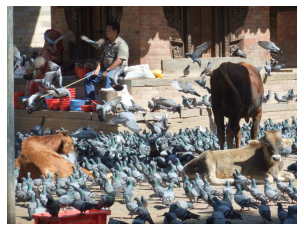

In [51]:
# print accuracies
print ("\n")
print ("Overall Accuracy is: %.02f\n" %(vqaEval.accuracy['overall']))
print ("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
	print ("%s : %.02f" %(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print ("\n")
print ("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
	print ("%s : %.02f" %(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print ("\n")
# demo how to use evalQA to retrieve low score result
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]<35]   #35 is per question percentage accuracy
if len(evals) > 0:
	print ('ground truth answers')
	randomEval = random.choice(evals)
	randomAnn = vqa.loadQA(randomEval)
	vqa.showQA(randomAnn)

	print ('\n')
	print ('generated answer (accuracy %.02f)'%(vqaEval.evalQA[randomEval]))
	ann = vqaRes.loadQA(randomEval)[0]
	print ("Answer:   %s\n" %(ann['answer']))

	imgId = randomAnn[0]['image_id']
	imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
	if os.path.isfile(imgDir + imgFilename):
		I = io.imread(imgDir + imgFilename)
		plt.imshow(I)
		plt.axis('off')
		plt.show()

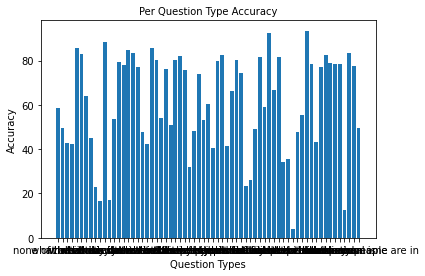

In [52]:
# plot accuracy for various question types
plt.bar(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].values(), align='center')
plt.xticks(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].keys(), rotation='0',fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))